# Experiment 11 - 2 zeroshot learning evaluation with noisy PS
## Re-order pretraining regimen -- first simple task, then primitives pretraining (reviewer request)

In [56]:
import numpy as np
import torch
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from model import analysis
from importlib import reload
import tools
import pandas as pd
analysis = reload(analysis)
plt.rcParams['font.sans-serif'] = "Arial"
import h5py
import nibabel as nib

In [6]:
datadir = '../../data/model_results/experiment10/'
datadir11 = '../../data/model_results/experiment11/'

figuredir = '../figures/manuscriptFigures_v2/SFig_ReversedPretraining/'
figuredir = '../manuscripts/neurips2022/figures/SFig_ReversedPretraining/'


palette = sns.color_palette("Set2")


# Load data

In [3]:
simstart = 0 
simend = 40

# df_adam0 = pd.read_csv(datadir + 'expt10c_adam_zeroshot_2layers_2rulepretraining_simData' + str(simstart) + '.csv')
# df_adam0.insert(len(df_adam0.columns),"Simulation",list(np.repeat(simstart,len(df_adam0))),True)
# df_adam0.insert(len(df_adam0.columns),"Layers",list(np.repeat(2,len(df_adam0))),True)
# df_adam0.insert(len(df_adam0.columns),"Training",list(np.repeat('Simple task pretraining',len(df_adam0))),True)
# #
# df_adam0_1rule = pd.read_csv(datadir + 'expt10c_adam_zeroshot_2layers_pretraining_simData' + str(simstart) + '.csv')
# df_adam0_1rule.insert(len(df_adam0_1rule.columns),"Simulation",list(np.repeat(simstart,len(df_adam0_1rule))),True)
# df_adam0_1rule.insert(len(df_adam0_1rule.columns),"Layers",list(np.repeat(2,len(df_adam0_1rule))),True)
# df_adam0_1rule.insert(len(df_adam0_1rule.columns),"Training",list(np.repeat('Concept pretraining',len(df_adam0_1rule))),True)
# #
# df_adam0_nopretraining = pd.read_csv(datadir + 'expt10c_adam_zeroshot_2layers_simData' + str(simstart) + '.csv')
# df_adam0_nopretraining.insert(len(df_adam0_nopretraining.columns),"Simulation",list(np.repeat(simstart,len(df_adam0_nopretraining))),True)
# df_adam0_nopretraining.insert(len(df_adam0_nopretraining.columns),"Layers",list(np.repeat(2,len(df_adam0_nopretraining))),True)
# df_adam0_nopretraining.insert(len(df_adam0_nopretraining.columns),"Training",list(np.repeat('Vanilla',len(df_adam0_nopretraining))),True)
#
df_adam0_combined = pd.read_csv(datadir + 'expt10c_adam_zeroshot_2layers_pretraining_2rulepretraining_simData' + str(simstart) + '.csv')
df_adam0_combined.insert(len(df_adam0_combined.columns),"Simulation",list(np.repeat(simstart,len(df_adam0_combined))),True)
df_adam0_combined.insert(len(df_adam0_combined.columns),"Layers",list(np.repeat(2,len(df_adam0_combined))),True)
df_adam0_combined.insert(len(df_adam0_combined.columns),"Training",list(np.repeat('Combined',len(df_adam0_combined))),True)

#
df_adam0_combined_reversed = pd.read_csv(datadir11 + 'expt10_adam_zeroshot_2layers_pretraining_2rulepretraining_simData' + str(simstart) + '.csv')
df_adam0_combined_reversed.insert(len(df_adam0_combined_reversed.columns),"Simulation",list(np.repeat(simstart,len(df_adam0_combined))),True)
df_adam0_combined_reversed.insert(len(df_adam0_combined_reversed.columns),"Layers",list(np.repeat(2,len(df_adam0_combined))),True)
df_adam0_combined_reversed.insert(len(df_adam0_combined_reversed.columns),"Training",list(np.repeat('CombinedReversed',len(df_adam0_combined))),True)

for i in range(simstart+1,simend):
    ####
    # 2 layers
    #
    tmp = pd.read_csv(datadir + 'expt10c_adam_zeroshot_2layers_pretraining_2rulepretraining_simData' + str(i) + '.csv')
    tmp.insert(len(tmp.columns),"Simulation",list(np.repeat(i,len(tmp))),True)
    tmp.insert(len(tmp.columns),"Layers",list(np.repeat(2,len(tmp))),True)
    tmp.insert(len(tmp.columns),"Training",list(np.repeat('Combined',len(tmp))),True)
    tmp['LogicAvg'] = tmp[['LogicPS1', 'LogicPS2']].mean(axis=1)
    tmp['SensoryAvg'] = tmp[['SensoryPS1', 'SensoryPS2']].mean(axis=1)
    tmp['MotorAvg'] = tmp[['MotorPS1', 'MotorPS2']].mean(axis=1)
    tmp['PSavg'] = tmp[['LogicAvg', 'SensoryAvg','MotorAvg']].mean(axis=1)
    df_adam0_combined = df_adam0_combined.append(tmp)
    #
    tmp = pd.read_csv(datadir11 + 'expt10_adam_zeroshot_2layers_pretraining_2rulepretraining_simData' + str(i) + '.csv')
    tmp.insert(len(tmp.columns),"Simulation",list(np.repeat(i,len(tmp))),True)
    tmp.insert(len(tmp.columns),"Layers",list(np.repeat(2,len(tmp))),True)
    tmp.insert(len(tmp.columns),"Training",list(np.repeat('CombinedReversed',len(tmp))),True)
    tmp['LogicAvg'] = tmp[['LogicPS1', 'LogicPS2']].mean(axis=1)
    tmp['SensoryAvg'] = tmp[['SensoryPS1', 'SensoryPS2']].mean(axis=1)
    tmp['MotorAvg'] = tmp[['MotorPS1', 'MotorPS2']].mean(axis=1)
    tmp['PSavg'] = tmp[['LogicAvg', 'SensoryAvg','MotorAvg']].mean(axis=1)
    df_adam0_combined_reversed = df_adam0_combined_reversed.append(tmp)
    
    
# df_adam0.Accuracy = df_adam0.Accuracy.values*100.0
# df_adam0_1rule.Accuracy = df_adam0_1rule.Accuracy.values*100.0
# df_adam0_nopretraining.Accuracy = df_adam0_nopretraining.Accuracy.values*100.0
df_adam0_combined.Accuracy = df_adam0_combined.Accuracy.values*100.0
df_adam0_combined_reversed.Accuracy = df_adam0_combined_reversed.Accuracy.values*100.0
df_all = pd.concat([df_adam0_combined_reversed,df_adam0_combined])
# df_all['Training'] = df_all['Training'].replace({'Concept pretraining': 'Primitives pretraining'})

Combined vs. Reversed Combined PS avg
	 t = -1.3077384877913214 | p = 0.19490408657285918


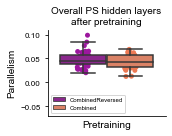

In [28]:
plt.figure(figsize=(2.5,2.))
ax = sns.boxplot(x="NumPracticedTasks",y="PSavg",hue='Training',palette='plasma',data=df_all,sym='')
sns.stripplot(x="NumPracticedTasks",y="PSavg",hue='Training',palette='plasma',dodge=True,data=df_all,zorder=0)
plt.title('Overall PS hidden layers\nafter pretraining', fontsize=10)
plt.xlabel('Pretraining', fontsize=10)
plt.ylabel('Parallelism', fontsize=10)
plt.xticks([],fontsize=8);
plt.yticks(fontsize=8);
# plt.ylim([0.2,.5])
handles, labels = ax.get_legend_handles_labels()
# When creating the legend, only use the first two elements
# to effectively remove the last two.
l = plt.legend(handles[0:2], labels[0:2],fontsize=6)
# When creating the legend, only use the first two elements
# to effectively remove the last two.
# l = plt.legend(handles[0:4], labels[0:4],fontsize=8)
plt.ylim([-.07,.11])
sns.despine()
plt.tight_layout()
# plt.savefig(figuredir + 'Expt11_ModelPS_Average_ZeroShot.png', dpi=300)
      
t, p = stats.ttest_ind(df_all.PSavg[df_all.Training=='Combined'].values[1:],df_all.PSavg[df_all.Training=='CombinedReversed'].values[1:])
print('Combined vs. Reversed Combined PS avg')
print('\t t =', t, '| p =', p)


## Plot Generalization Performance and Sample Efficiency of combined training vs reverse-combined training

#### First load in vanilla model with CPRO task training (from expt 8)

In [30]:
df_vanilla_cprotrained = pd.DataFrame()
for i in range(simstart,simend):
    tmp = pd.read_csv(datadir + 'expt10c_adam_90accCutOff_2layers_practice_simData' + str(i) + '.csv')
    tmp.insert(len(tmp.columns),"Simulation",list(np.repeat(i,len(tmp))),True)
    tmp.insert(len(tmp.columns),"Training",list(np.repeat('Vanilla',len(tmp))),True)
    df_vanilla_cprotrained = df_vanilla_cprotrained.append(tmp)

In [31]:
vanilla_palette = [sns.color_palette("tab20b")[1],sns.color_palette("tab20b")[3]]
pretrained_palette = [sns.color_palette("tab20b")[5],sns.color_palette("tab20b")[6]]
depth_palette = [sns.color_palette("tab20b")[8],sns.color_palette("tab20b")[10]]


df_ps_combined = {}
df_ps_combined['Depth'] = []
df_ps_combined['DepthCount'] = []
df_ps_combined['Parallelism'] = []
df_ps_combined['Domain'] = []
df_ps_combined['Simulation'] = []
df_ps_combined['Accuracy'] = []
df_ps_combined['Samples'] = []

df_ps_combined_revered = {}
df_ps_combined_revered['Depth'] = []
df_ps_combined_revered['DepthCount'] = []
df_ps_combined_revered['Parallelism'] = []
df_ps_combined_revered['Domain'] = []
df_ps_combined_revered['Simulation'] = []
df_ps_combined_revered['Accuracy'] = []
df_ps_combined_revered['Samples'] = []


for i in range(simstart,simend):
    # Combined pretraining
    tmpdf = df_adam0_combined.loc[df_adam0_combined.Simulation==i]
    tmpdf = tmpdf.loc[tmpdf.NumPracticedTasks==0]
    for depth in range(1,3):
        for rule in ['Sensory','Logic','Motor']:
            df_ps_combined['Simulation'].append(i)
            df_ps_combined['Depth'].append('Depth ' + str(depth))
            df_ps_combined['DepthCount'].append(depth)
            df_ps_combined['Domain'].append(rule)
            df_ps_combined['Parallelism'].append(tmpdf[rule + 'PS' + str(depth)].values[0])
            df_ps_combined['Samples'].append(tmpdf.NumPretrainingTrials.values[0]+tmpdf.NumActualTrials.values[0])
            df_ps_combined['Accuracy'].append(tmpdf.Accuracy.values[0])
            
    # CombinedReversed pretraining
    tmpdf = df_adam0_combined_reversed.loc[df_adam0_combined_reversed.Simulation==i]
    tmpdf = tmpdf.loc[tmpdf.NumPracticedTasks==0]
    for depth in range(1,3):
        for rule in ['Sensory','Logic','Motor']:
            df_ps_combined_revered['Simulation'].append(i)
            df_ps_combined_revered['Depth'].append('Depth ' + str(depth))
            df_ps_combined_revered['DepthCount'].append(depth)
            df_ps_combined_revered['Domain'].append(rule)
            df_ps_combined_revered['Parallelism'].append(tmpdf[rule + 'PS' + str(depth)].values[0])
            df_ps_combined_revered['Samples'].append(tmpdf.NumPretrainingTrials.values[0]+tmpdf.NumActualTrials.values[0])
            df_ps_combined_revered['Accuracy'].append(tmpdf.Accuracy.values[0])

df_ps_combined = pd.DataFrame(df_ps_combined)
# df_ps_vanilla = pd.DataFrame(df_ps_vanilla)
df_ps_combined_revered = pd.DataFrame(df_ps_combined_revered)


In [35]:

df_ps_combined_revered = df_ps_combined_revered.groupby('Simulation').mean()
df_ps_combined_revered.insert(len(df_ps_combined_revered.columns),"Model",list(np.repeat('Pretrained-reversed',len(df_ps_combined_revered))),True)

df_combined_tmp = df_ps_combined.groupby('Simulation').mean()
df_combined_tmp.insert(len(df_combined_tmp.columns),"Model",list(np.repeat('Pretrained',len(df_combined_tmp))),True)

# df_vanillatrained_tmp = df_ps_vanilla_trained.groupby('Simulation').mean()
# df_vanillatrained_tmp.insert(len(df_vanillatrained_tmp.columns),"Model",list(np.repeat('Trained Vanilla',len(df_vanillatrained_tmp))),True)
# df_vanillatrained_tmp.Accuracy = df_ps_vanilla_trained.Accuracy*100

# df_comparison = pd.concat([df_vanilla_tmp,df_combined_tmp,df_vanillatrained_tmp])
df_comparison = pd.concat([df_combined_tmp,df_ps_combined_revered])

palette = [sns.color_palette("tab20b")[2],sns.color_palette("tab20b")[6],sns.color_palette("tab20b")[10]]

Mean generalization performance and sample efficiency metrics
Vanilla accuracy: nan | Sample efficiency: nan
Pretrained accuracy: 92.14127604166669 | Sample efficiency: 1620508.8
Vanilla trained accuracy: nan | Sample efficiency: nan
Proportion of samples on the trained vanilla model relative to pretrained model: nan


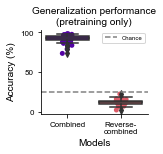

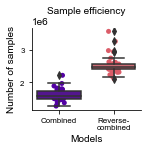

In [43]:
tmp_palette = [sns.color_palette('plasma')[0], sns.color_palette('plasma')[3], sns.color_palette('plasma')[0]]
plt.figure(figsize=(2.25,2.25))
# plt.subplot(121)
ax = sns.boxplot(x="Model",y="Accuracy",palette=tmp_palette,data=df_comparison)
sns.stripplot(x="Model",y="Accuracy",palette=tmp_palette,dodge=True,data=df_comparison,zorder=0)
plt.plot(np.arange(-0.5,2.5),np.repeat(25,3),'gray',linestyle='--',label='Chance')
plt.title('Generalization performance\n(pretraining only)', fontsize=10,y=1.0)
plt.xlabel('Models',fontsize=10)
plt.ylabel('Accuracy (%)', fontsize=10)
plt.xticks(np.arange(2), ['Combined','Reverse-\ncombined'],fontsize=8);
plt.yticks(fontsize=8);
plt.legend(fontsize=6)
# plt.ylim([-.04,.3])
sns.despine()
plt.tight_layout()
plt.savefig(figuredir + 'Expt11_Generalization_ReverseCombined.png',dpi=300)


plt.figure(figsize=(2.25,2.25))
# plt.subplot(122)
ax = sns.boxplot(x="Model",y="Samples",palette=tmp_palette,data=df_comparison)
sns.stripplot(x="Model",y="Samples",palette=tmp_palette,dodge=True,data=df_comparison,zorder=0)
plt.title('Sample efficiency', fontsize=10,y=1.1)
plt.xlabel('Models',fontsize=10)
plt.ylabel('Number of samples', fontsize=10)
# plt.xticks(fontsize=8,rotation=-15);
plt.xticks(np.arange(2), ['Combined','Reverse-\ncombined'],fontsize=8);
plt.yticks(fontsize=8);
# plt.ylim([-.04,.3])
sns.despine()

plt.tight_layout()
plt.savefig(figuredir + 'Expt11_SampleEfficiency_ReverseCombined.png',dpi=300)


print('Mean generalization performance and sample efficiency metrics')
print('Vanilla accuracy:', df_comparison.loc[df_comparison.Model=='Vanilla'].Accuracy.mean(), '| Sample efficiency:', df_comparison.loc[df_comparison.Model=='Vanilla'].Samples.mean())
print('Pretrained accuracy:', df_comparison.loc[df_comparison.Model=='Pretrained'].Accuracy.mean(), '| Sample efficiency:', df_comparison.loc[df_comparison.Model=='Pretrained'].Samples.mean())
print('Vanilla trained accuracy:', df_comparison.loc[df_comparison.Model=='Trained Vanilla'].Accuracy.mean(), '| Sample efficiency:', df_comparison.loc[df_comparison.Model=='Trained Vanilla'].Samples.mean())
print('Proportion of samples on the trained vanilla model relative to pretrained model:', df_comparison.loc[df_comparison.Model=='Trained Vanilla'].Samples.mean()/df_comparison.loc[df_comparison.Model=='Pretrained'].Samples.mean())

# Visualize PS matrices for each hidden layer

In [86]:
simstart = 0 
simend = 40

ps_logic_mat = np.zeros((4,4,3,40)) # rules x rules, layers, sims
ps_sensory_mat = np.zeros((4,4,3,40)) # rules x rules, layers, sims
ps_motor_mat = np.zeros((4,4,3,40)) # rules x rules, layers, sims
for i in range(simstart+1,simend):
    ####
    # 2 layers
    #
    h5f = h5py.File('../../data/model_results/experiment11/expt10_adam_zeroshot_3layers_pretraining_2rulepretraining_simData' + str(i) + 'psMatrices.h5','r')
    ps_logic_mat[:,:,:,i] = h5f['logic'][:].copy()
    ps_sensory_mat[:,:,:,i] = h5f['sensory'][:].copy()
    ps_motor_mat[:,:,:,i] = h5f['motor'][:].copy()
    logic_classes = pd.read_csv('../../data/model_results/experiment11/PS_ClassLabels_Logic.txt').values[:,1]
    sensory_classes = pd.read_csv('../../data/model_results/experiment11/PS_ClassLabels_Sensory.txt').values[:,1]
    motor_classes = pd.read_csv('../../data/model_results/experiment11/PS_ClassLabels_Motor.txt').values[:,1]
    h5f.close()

ps_logic_mat_avg = np.mean(ps_logic_mat,axis=3)
ps_sensory_mat_avg = np.mean(ps_sensory_mat,axis=3)
ps_motor_mat_avg = np.mean(ps_motor_mat,axis=3)



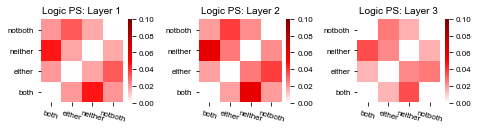

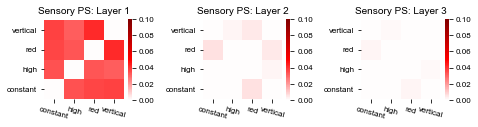

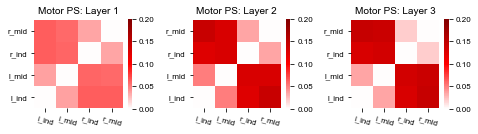

In [88]:
plt.figure(figsize=(6.75,2.5))
for layer in range(3):
    plt.subplot(int('13' + str(layer+1)))
    ax = sns.heatmap(ps_logic_mat_avg[:,:,layer], square=True, cmap='seismic',center=0,vmin=0,vmax=0.1,cbar=True,cbar_kws={'fraction':0.046})
    cbar = ax.collections[0].colorbar
    # here set the labelsize by 20
    cbar.ax.tick_params(labelsize=8)    
    ax.invert_yaxis()
    plt.xticks(np.arange(.5,4.5),logic_classes,fontsize=8,rotation=-15)
    plt.yticks(np.arange(0.5, 4.5),logic_classes,fontsize=8,rotation=0)
    plt.title('Logic PS: Layer ' + str(layer+1),fontsize=10)
plt.tight_layout()
    
plt.figure(figsize=(6.75,2.5))
for layer in range(3):
    plt.subplot(int('13' + str(layer+1)))
    ax = sns.heatmap(ps_sensory_mat_avg[:,:,layer], square=True, cmap='seismic',center=0,vmin=0,vmax=0.1,cbar=True,cbar_kws={'fraction':0.046})
    cbar = ax.collections[0].colorbar
    # here set the labelsize by 20
    cbar.ax.tick_params(labelsize=8)    
    ax.invert_yaxis()
    plt.xticks(np.arange(.5,4.5),sensory_classes,fontsize=8,rotation=-15)
    plt.yticks(np.arange(0.5, 4.5),sensory_classes,fontsize=8,rotation=0)
    plt.title('Sensory PS: Layer ' + str(layer+1),fontsize=10)
plt.tight_layout()
    
plt.figure(figsize=(6.75,2.5))
for layer in range(3):
    plt.subplot(int('13' + str(layer+1)))
    ax = sns.heatmap(ps_motor_mat_avg[:,:,layer], square=True, cmap='seismic',center=0,vmin=0,vmax=0.2,cbar=True,cbar_kws={'fraction':0.046})
    cbar = ax.collections[0].colorbar
    # here set the labelsize by 20
    cbar.ax.tick_params(labelsize=8)    
    ax.invert_yaxis()
    plt.xticks(np.arange(.5,4.5),motor_classes,fontsize=8,rotation=-15)
    plt.yticks(np.arange(0.5, 4.5),motor_classes,fontsize=8,rotation=0)
    plt.title('Motor PS: Layer ' + str(layer+1),fontsize=10)
plt.tight_layout()
    

# Get correponding matrices for PS in fMRI data

In [57]:
datadir = '../../data/results/'
# figuredir = '../figures/manuscriptFigures/Fig7_BrainANN_PSOverlap/'
neuripsdir = '../manuscripts/neurips2022/figures/Fig7_BoxPlotANNHumanHierarchyPS/'

rules = ['Motor','Logic','Sensory']
# rules = ['Sensory','Logic','Motor']
ps = {}
decoding = {}

for domain in rules:
    ps[domain] = nib.load(datadir + domain + 'RulePSGroup.dscalar.nii').get_fdata().T
    decoding[domain] = nib.load(datadir + domain + 'RuleDecoding.dscalar.nii').get_fdata().T

# Load in gradient
hierarchical_gradient = nib.load(datadir + '../hcp.gradients.dscalar.nii').get_fdata().T

# Load in glasser atlas
glasser = np.squeeze(nib.load(datadir + '../Q1-Q6_RelatedParcellation210.LR.CorticalAreas_dil_Colors.32k_fs_RL.dlabel.nii').get_fdata())


In [62]:
# Load network
# Using final partition
networkdef = np.loadtxt('../../data/network_partition.txt')
networkorder = np.asarray(sorted(range(len(networkdef)), key=lambda k: networkdef[k]))
networkorder.shape = (len(networkorder),1)
# network mappings for final partition set
networkmappings = {'fpn':7, 'vis1':1, 'vis2':2, 'smn':3, 'aud':8, 'lan':6, 'dan':5, 'con':4, 'dmn':9, 
                   'pmulti':10, 'none1':11, 'none2':12}
networks = networkmappings.keys()

n_parcels = 360

#
h5f = h5py.File('../../data/results/PS_matrices_Logic.h5','r')
logicps_mat = h5f['data'][:].copy()
h5f.close()
logic_classes = pd.read_csv('../../data/results/PS_Logic_ClassLabels.txt').values[:,1]

h5f = h5py.File('../../data/results/PS_matrices_Sensory.h5','r')
sensoryps_mat = h5f['data'][:].copy()
h5f.close()
sensory_classes = pd.read_csv('../../data/results/PS_Sensory_ClassLabels.txt').values[:,1]

h5f = h5py.File('../../data/results/PS_matrices_Motor.h5','r')
motorps_mat = h5f['data'][:].copy()
h5f.close()
motor_classes = pd.read_csv('../../data/results/PS_Motor_ClassLabels.txt').values[:,1]


In [64]:
associationnets = ['con','dan','lan','fpn','dmn','pmulti','none1','none2']
sensorimotornets = ['vis1','vis2','smn','aud']
sensorynets = ['vis1','vis2','aud']
motornets = ['smn']

ruledomains = ['Sensory', 'Logic', 'Motor']

sensory_rois = []
for net in sensorynets:
    sensory_rois.extend(np.where(networkdef==networkmappings[net])[0])

association_rois = []
for net in associationnets:
    association_rois.extend(np.where(networkdef==networkmappings[net])[0])

motor_rois = []    
for net in motornets:
    motor_rois.extend(np.where(networkdef==networkmappings[net])[0])
    
sensory_rois = np.asarray(sensory_rois)
association_rois = np.asarray(association_rois)
motor_rois = np.asarray(motor_rois)


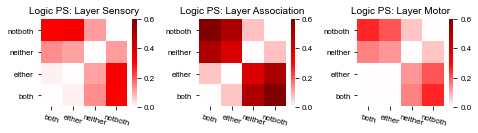

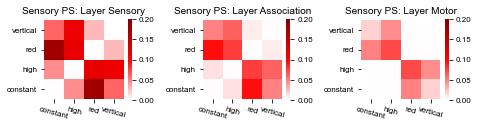

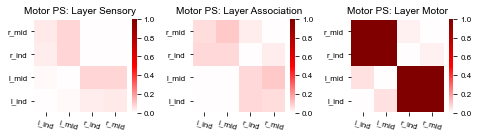

In [92]:
layers = [sensory_rois,association_rois,motor_rois]
layer_id = ['Sensory', 'Association', 'Motor']
motor_ind = np.asarray([0,1,2,3]) # same ordering as in ANN
motor_ind.shape = (len(motor_ind),1)
motor_classes = ['l_ind','l_mid','r_ind', 'r_mid']

sensory_ind = np.asarray([0,3,1,2]) # sensory classes are not the same label ordering as in ANN experiment
sensory_ind.shape = (len(sensory_ind),1)
sensory_classes = ['constant','high','red','vertical']

logic_ind = np.asarray([0,1,2,3])
logic_ind.shape = (len(logic_ind),1)
logic_classes = np.asarray(['both','either','neither','notboth'])

plt.figure(figsize=(6.75,2.5))
i = 1
for layer in layers:
    plt.subplot(int('13' + str(i)))
    ax = sns.heatmap(np.mean(logicps_mat[logic_ind,logic_ind.T][:,:,layer],axis=2), square=True, cmap='seismic',vmin=0,vmax=0.6,center=0,cbar=True,cbar_kws={'fraction':0.046})
    cbar = ax.collections[0].colorbar
    # here set the labelsize by 20
    cbar.ax.tick_params(labelsize=8)    
    ax.invert_yaxis()
    plt.xticks(np.arange(.5,4.5),logic_classes,fontsize=8,rotation=-15)
    plt.yticks(np.arange(0.5, 4.5),logic_classes,fontsize=8,rotation=0)
    plt.title('Logic PS: Layer ' + layer_id[i-1],fontsize=10)
    i += 1
plt.tight_layout()

plt.figure(figsize=(6.75,2.5))
i = 1
for layer in layers:
    plt.subplot(int('13' + str(i)))
    ax = sns.heatmap(np.mean(sensoryps_mat[sensory_ind,sensory_ind.T][:,:,layer],axis=2), square=True, cmap='seismic',vmin=0,vmax=0.2,center=0,cbar=True,cbar_kws={'fraction':0.046})
    cbar = ax.collections[0].colorbar
    # here set the labelsize by 20
    cbar.ax.tick_params(labelsize=8)    
    ax.invert_yaxis()
    plt.xticks(np.arange(.5,4.5),sensory_classes,fontsize=8,rotation=-15)
    plt.yticks(np.arange(0.5, 4.5),sensory_classes,fontsize=8,rotation=0)
    plt.title('Sensory PS: Layer ' + layer_id[i-1],fontsize=10)
    i += 1
plt.tight_layout()

plt.figure(figsize=(6.75,2.5))
i = 1
for layer in layers:
    plt.subplot(int('13' + str(i)))
    ax = sns.heatmap(np.mean(motorps_mat[motor_ind, motor_ind.T][:,:,layer],axis=2), square=True, cmap='seismic',vmin=0,vmax=1.0,center=0,cbar=True,cbar_kws={'fraction':0.046})
    cbar = ax.collections[0].colorbar
    # here set the labelsize by 20
    cbar.ax.tick_params(labelsize=8)    
    ax.invert_yaxis()
    plt.xticks(np.arange(.5,4.5),motor_classes,fontsize=8,rotation=-15)
    plt.yticks(np.arange(0.5, 4.5),motor_classes,fontsize=8,rotation=0)
    plt.title('Motor PS: Layer ' + layer_id[i-1],fontsize=10)
    i += 1
plt.tight_layout()
